In [2]:
import pandas as pd
import os

# Check the current working directory
print("Current working directory:", os.getcwd())

# List the files in the current directory
print("Files in the current directory:", os.listdir())

# Check if the file exists
file_path = '../data/raw/brain.csv'
if os.path.exists(file_path):
	try:
		# Load the CSV file
		df = pd.read_csv(file_path)
		print("File loaded successfully")
	except pd.errors.EmptyDataError:
		print("No columns to parse from file")
else:
	print(f"File not found: {file_path}")
df.shape

Current working directory: /Users/anuragtrivedi/MyApplication/MLOps_Classification/notebook
Files in the current directory: ['demo.ipynb', 'data']
File loaded successfully


(4981, 11)

In [3]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


(4981, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB
None
gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_le

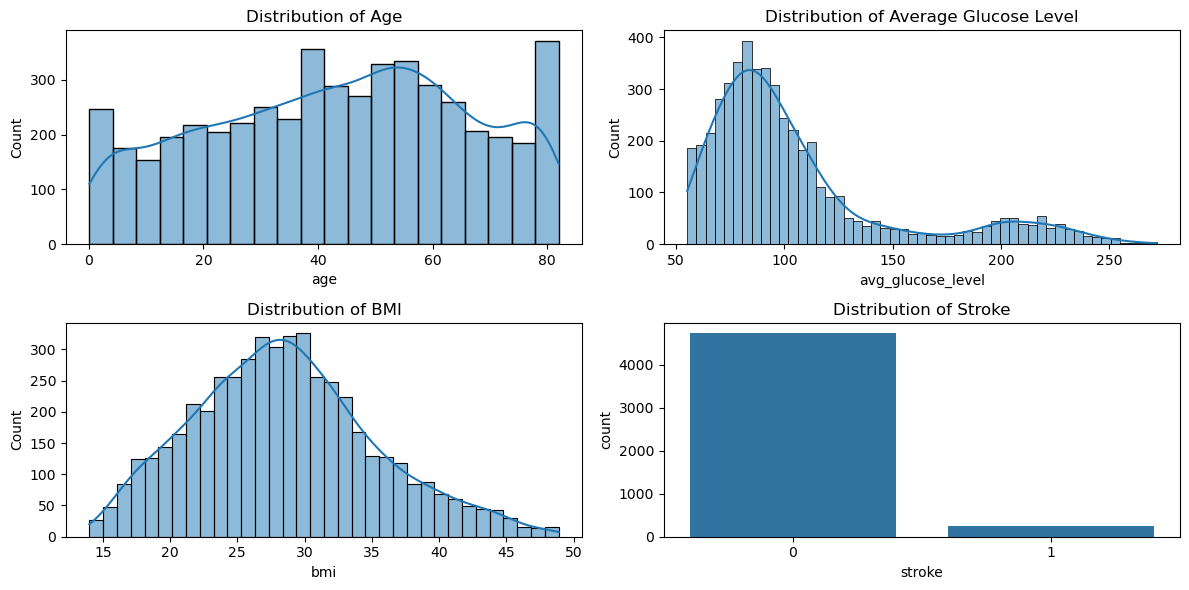

                        age  hypertension  heart_disease  avg_glucose_level  \
age                1.000000      0.278120       0.264852           0.236763   
hypertension       0.278120      1.000000       0.111974           0.170028   
heart_disease      0.264852      0.111974       1.000000           0.166847   
avg_glucose_level  0.236763      0.170028       0.166847           1.000000   
bmi                0.373703      0.158762       0.060926           0.186348   
stroke             0.246478      0.131965       0.134610           0.133227   

                        bmi    stroke  
age                0.373703  0.246478  
hypertension       0.158762  0.131965  
heart_disease      0.060926  0.134610  
avg_glucose_level  0.186348  0.133227  
bmi                1.000000  0.056926  
stroke             0.056926  1.000000  


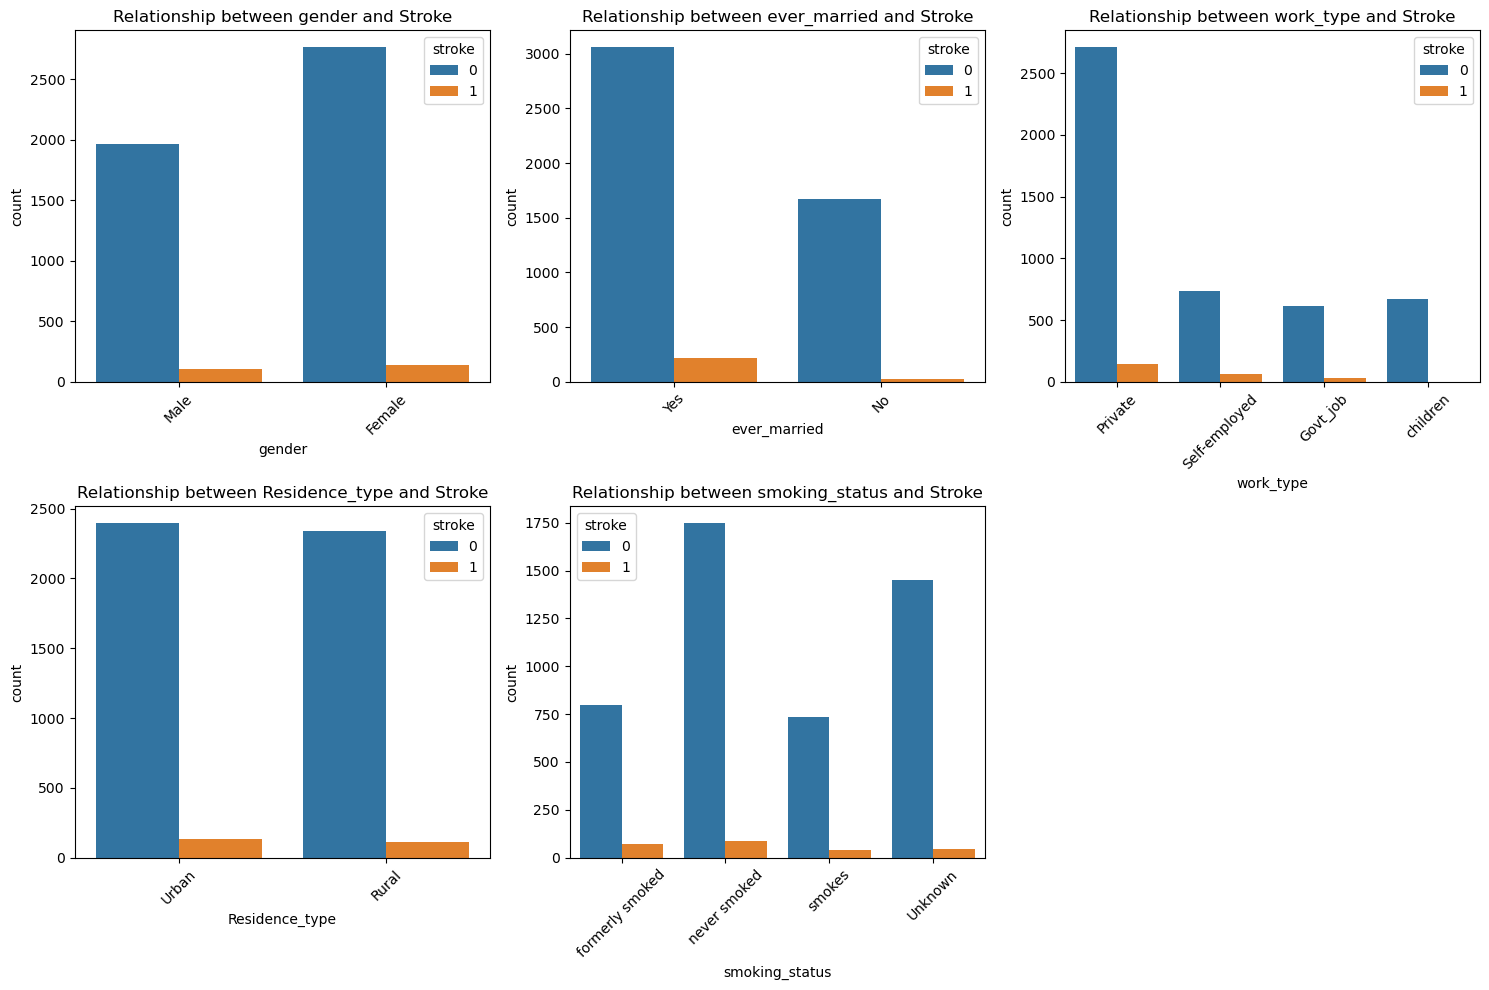

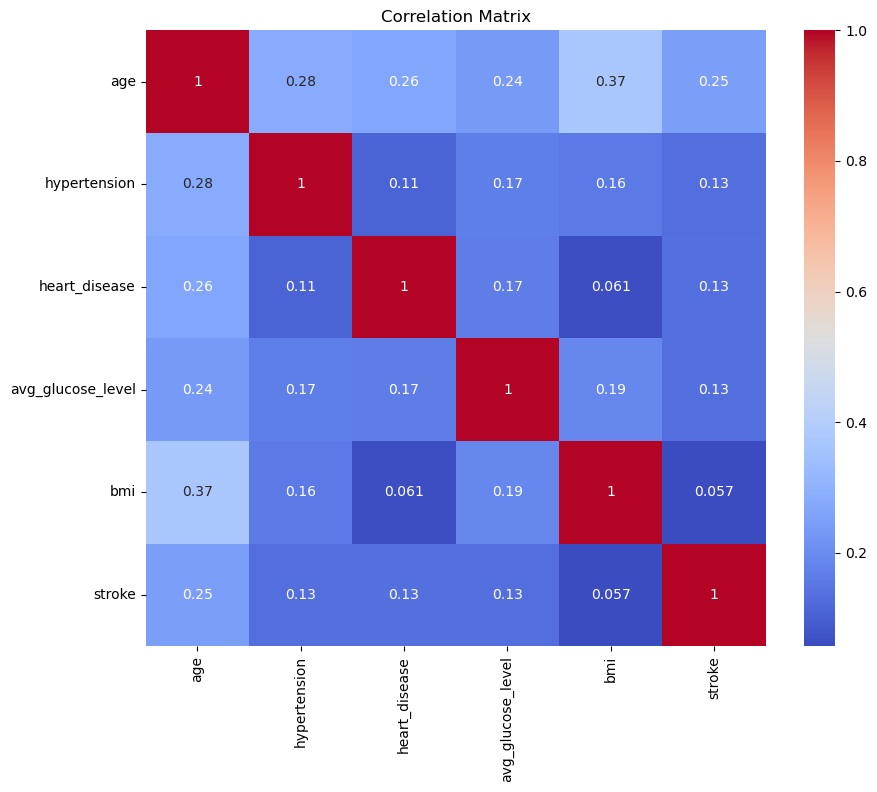

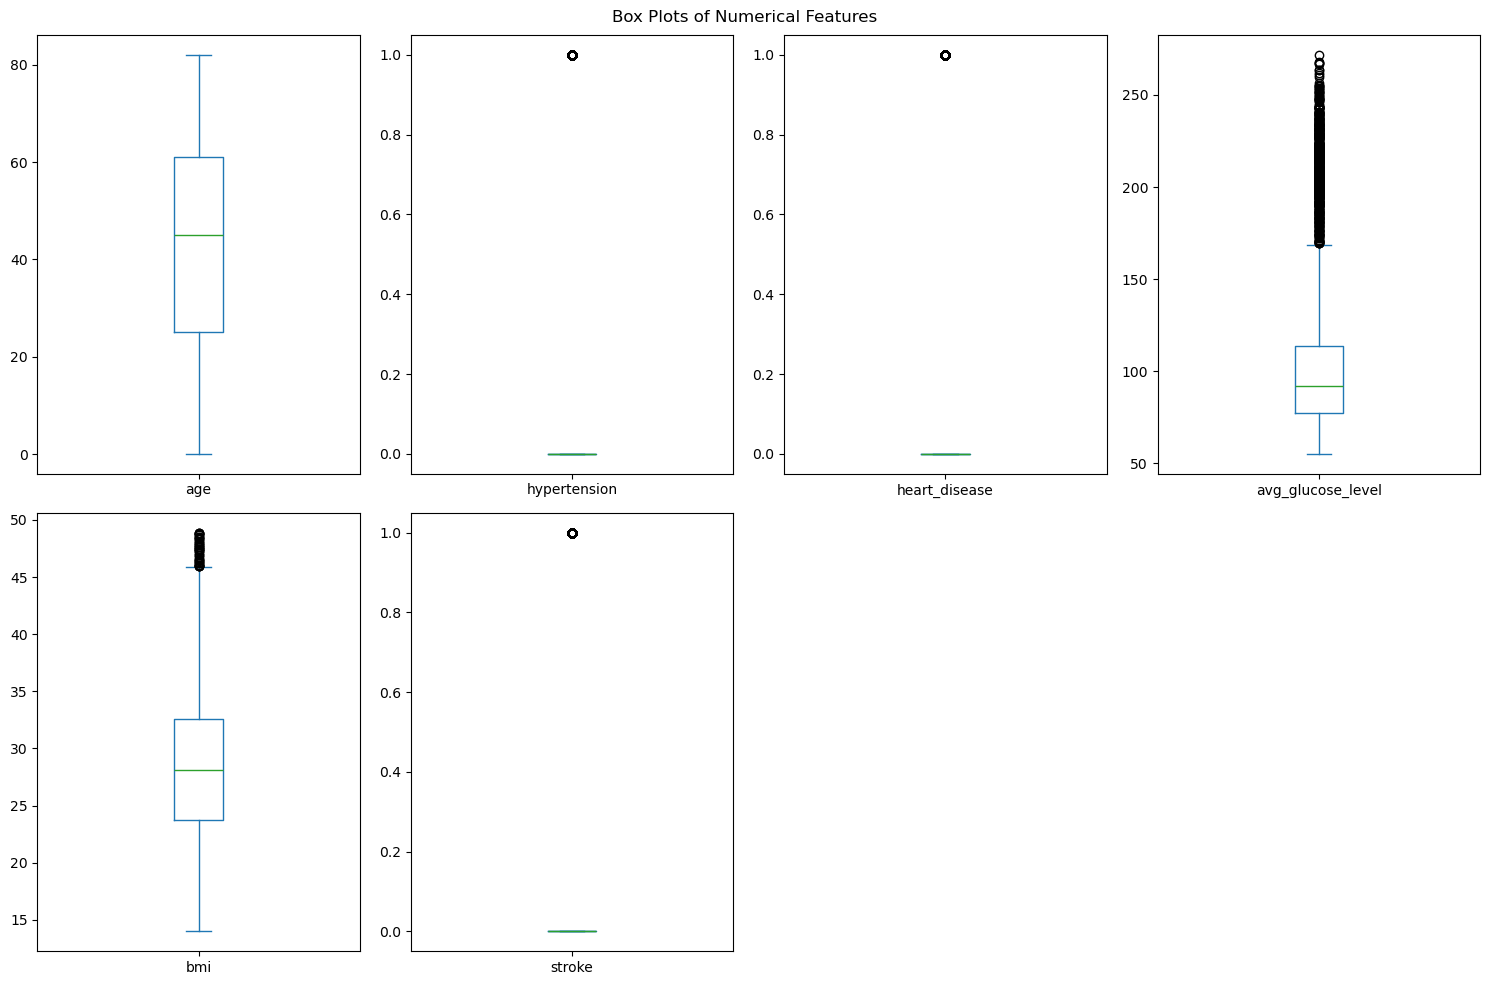


Stroke Distribution:
 stroke
0    4733
1     248
Name: count, dtype: int64

Percentage of Stroke:
 stroke
0    95.02108
1     4.97892
Name: proportion, dtype: float64


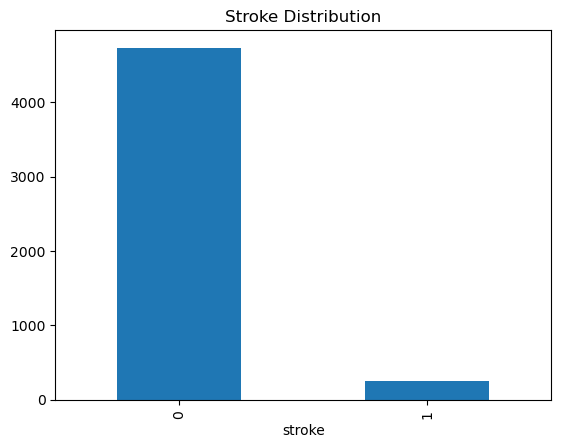

In [4]:
# Examine data types and missing values
print(df.shape)
print(df.info())
print(df.isnull().sum() / len(df) * 100)

# Summary statistics
print(df.describe())
print(df['stroke'].value_counts())

import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distributions
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df['age'], kde=True)
plt.title('Distribution of Age')
plt.subplot(2, 2, 2)
sns.histplot(df['avg_glucose_level'], kde=True)
plt.title('Distribution of Average Glucose Level')
plt.subplot(2, 2, 3)
sns.histplot(df['bmi'], kde=True)
plt.title('Distribution of BMI')
plt.subplot(2, 2, 4)
sns.countplot(x='stroke', data=df)
plt.title('Distribution of Stroke')
plt.tight_layout()
plt.show()

# Correlation analysis
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)

# Categorical feature analysis
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=feature, hue='stroke', data=df)
    plt.title(f'Relationship between {feature} and Stroke')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Correlation Analysis (Preliminary)
try:
    correlation_matrix = df.corr(numeric_only=True)
    import seaborn as sns
    plt.figure(figsize=(10,8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()
except Exception as e:
    print(f"An error occurred during correlation analysis: {e}")

# Outlier Detection (Preliminary) - Box Plots
numerical_cols = df.select_dtypes(include=['number']).columns
df[numerical_cols].plot(kind='box', subplots=True, layout=(2, 4), figsize=(15, 10), title='Box Plots of Numerical Features')
plt.tight_layout()
plt.show()

# Target Variable Analysis
print("\nStroke Distribution:\n", df['stroke'].value_counts())
print("\nPercentage of Stroke:\n", df['stroke'].value_counts(normalize=True) * 100)
df['stroke'].value_counts().plot(kind='bar', title='Stroke Distribution')
plt.show()

In [5]:

def remove_outliers_IQR(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_filtered = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data_filtered

# Remove outliers from the dataframe for specified columns
columns_to_clean = ['bmi', 'avg_glucose_level']  # Replace with your outlier columns
for column in columns_to_clean:
    df = remove_outliers_IQR(df, column)

print("Data shape after outlier removal:", df.shape)

Data shape after outlier removal: (4346, 11)


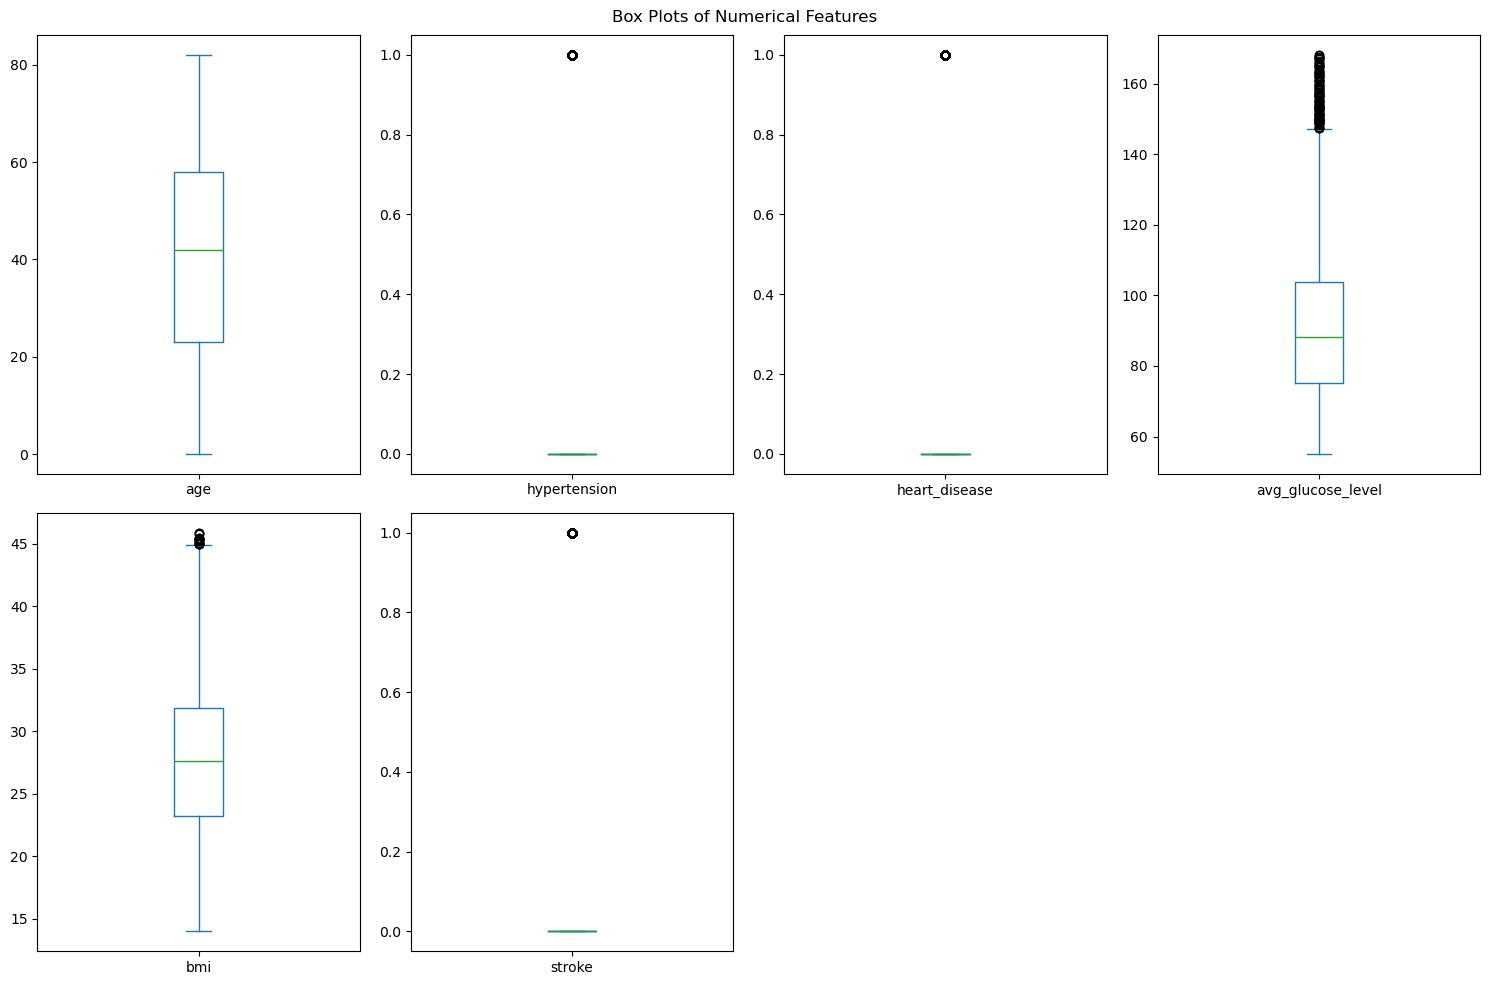

In [6]:
# Again Outlier Detection (Preliminary) - Box Plots
import matplotlib.pyplot as plt
numerical_cols = df.select_dtypes(include=['number']).columns
df[numerical_cols].plot(kind='box', subplots=True, layout=(2, 4), figsize=(15, 10), title='Box Plots of Numerical Features')
plt.tight_layout()
plt.show()

In [7]:
# Calculate skewness for numerical columns
skewness = df.skew(numeric_only=True)
print("Skewness of numerical columns:\n", skewness)

Skewness of numerical columns:
 age                 -0.028494
hypertension         3.227937
heart_disease        4.724834
avg_glucose_level    0.846258
bmi                  0.320452
stroke               4.836838
dtype: float64


In [8]:
import numpy as np
# Apply log transformation to a column
def log_transform(data, column):
    data[column] = np.log1p(data[column])  # np.log1p handles values close to zero
    return data

# Columns to log transform (e.g., if avg_glucose_level is skewed)
columns_to_log = ['bmi', 'avg_glucose_level'] # Replace with your skewed columns
for column in columns_to_log:
    df = log_transform(df, column)

In [9]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Male,80.0,0,1,Yes,Private,Rural,4.672081,3.511545,never smoked,1
5,Male,74.0,1,1,Yes,Private,Rural,4.263947,3.346389,never smoked,1
6,Female,69.0,0,0,No,Private,Urban,4.557974,3.169686,never smoked,1
7,Female,78.0,0,0,Yes,Private,Urban,4.087152,3.226844,Unknown,1
8,Female,81.0,1,0,Yes,Private,Rural,4.399744,3.424263,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4974,Male,58.0,0,0,Yes,Govt_job,Urban,4.453649,3.440418,never smoked,0
4976,Male,41.0,0,0,No,Private,Rural,4.264790,3.427515,formerly smoked,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,4.564557,3.490429,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,4.441945,3.433987,smokes,0


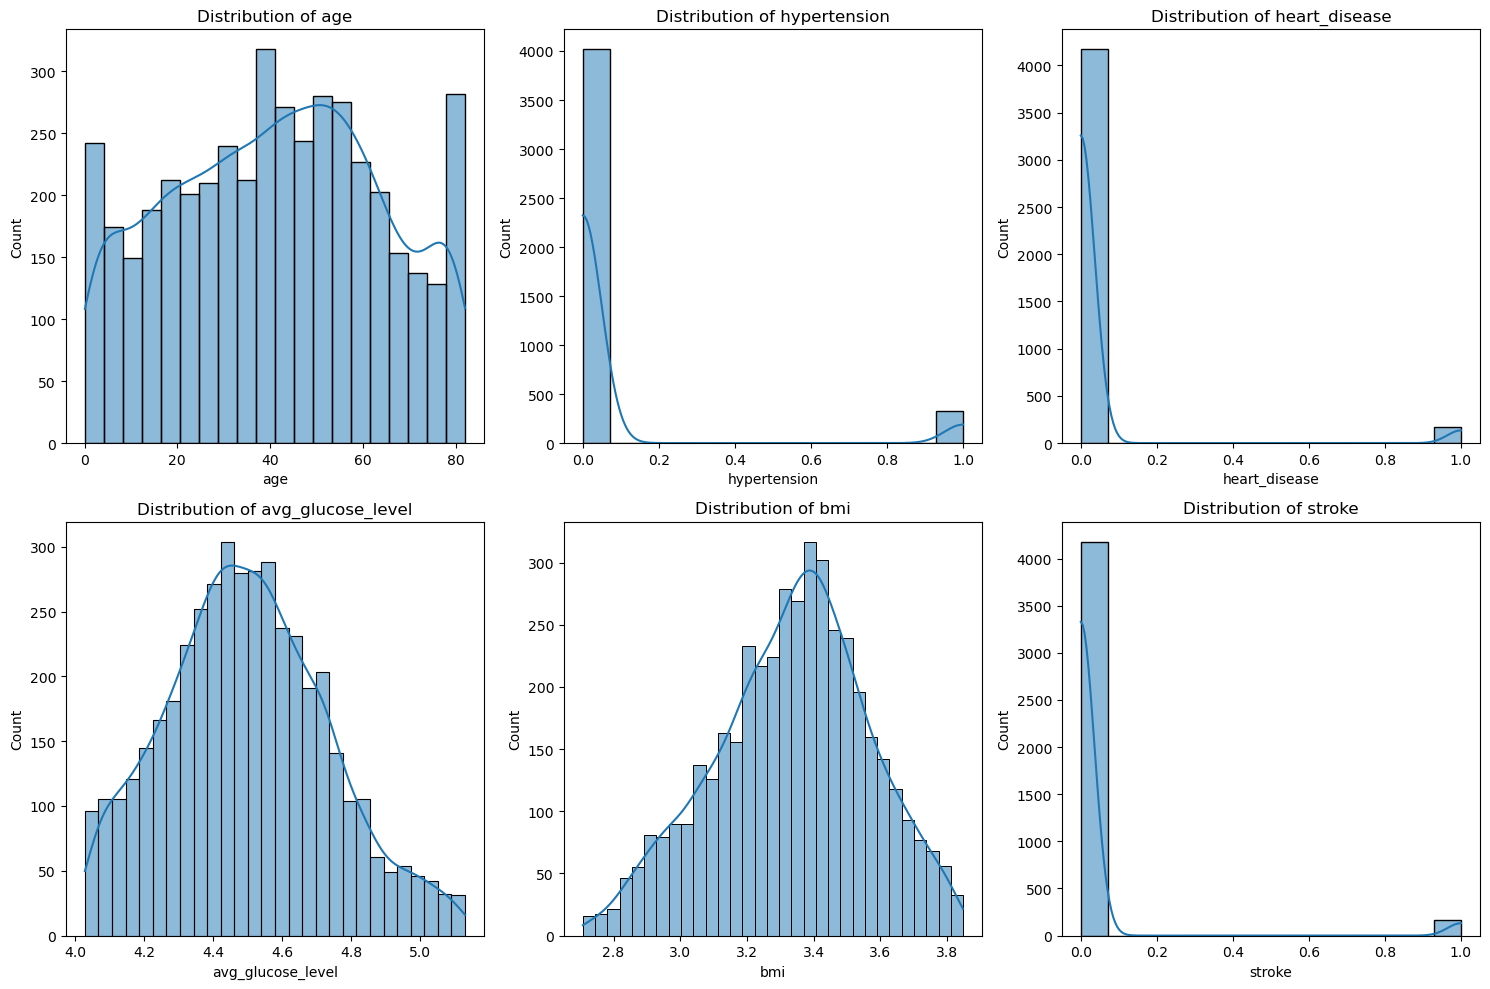

In [10]:
import seaborn as sns

import matplotlib.pyplot as plt

# Plot distributions of all numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [11]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Male,80.0,0,1,Yes,Private,Rural,4.672081,3.511545,never smoked,1
5,Male,74.0,1,1,Yes,Private,Rural,4.263947,3.346389,never smoked,1
6,Female,69.0,0,0,No,Private,Urban,4.557974,3.169686,never smoked,1
7,Female,78.0,0,0,Yes,Private,Urban,4.087152,3.226844,Unknown,1
8,Female,81.0,1,0,Yes,Private,Rural,4.399744,3.424263,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4974,Male,58.0,0,0,Yes,Govt_job,Urban,4.453649,3.440418,never smoked,0
4976,Male,41.0,0,0,No,Private,Rural,4.264790,3.427515,formerly smoked,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,4.564557,3.490429,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,4.441945,3.433987,smokes,0


In [12]:
# Import required libraries
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Select categorical columns
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Create OneHotEncoder instance
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' avoids multicollinearity

# Apply one-hot encoding
encoded_data = encoder.fit_transform(df[categorical_columns])

# Create a DataFrame with the encoded variables
encoded_df = pd.DataFrame(
    encoded_data,
    columns=encoder.get_feature_names_out(categorical_columns)
)

# Concatenate the encoded variables with the original numerical variables
numerical_columns = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
df = pd.concat([df[numerical_columns].reset_index(drop=True), encoded_df], axis=1)

In [13]:
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,80.0,0,1,4.672081,3.511545,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,74.0,1,1,4.263947,3.346389,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,69.0,0,0,4.557974,3.169686,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,78.0,0,0,4.087152,3.226844,1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,81.0,1,0,4.399744,3.424263,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4341,58.0,0,0,4.453649,3.440418,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4342,41.0,0,0,4.264790,3.427515,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4343,45.0,1,0,4.564557,3.490429,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4344,40.0,0,0,4.441945,3.433987,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


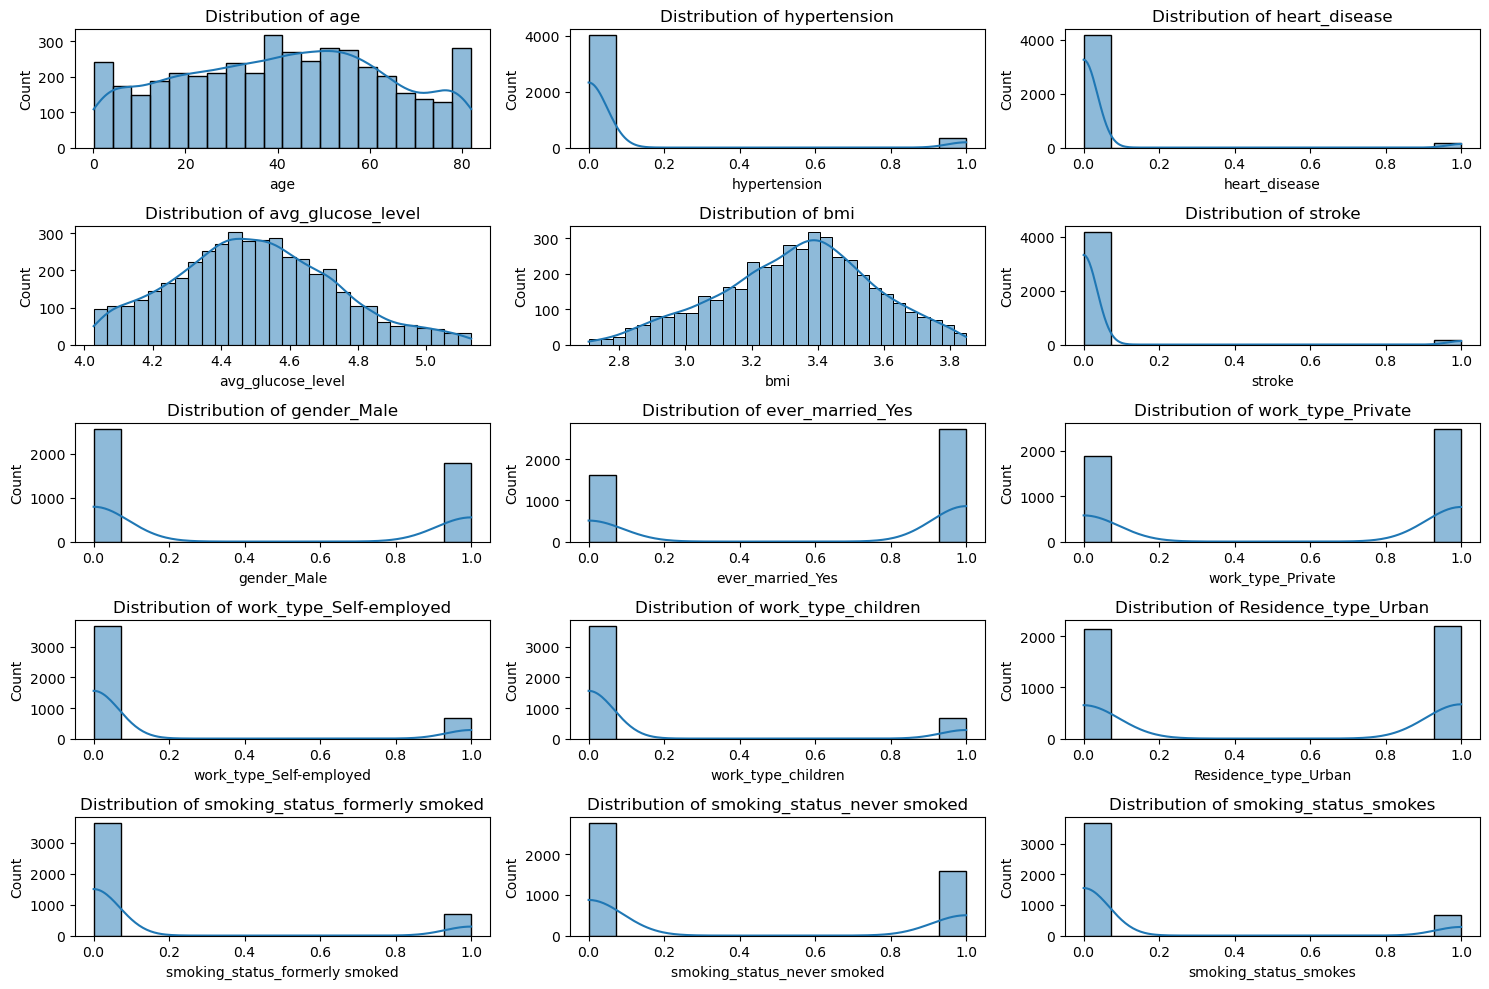

In [14]:
import seaborn as sns

import matplotlib.pyplot as plt

# Plot distributions of all numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(5, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [15]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Separate features (X) and target (y)
X = df.drop('stroke', axis=1)
y = df['stroke']

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

df_smote = pd.DataFrame(X_smote, columns=X.columns)
df_smote['stroke'] = y_smote
# Display the new balance of the dataset
stroke_counts_balanced = df_smote['stroke'].value_counts()
print("Count of Stroke occurrences after balancing:")
print(stroke_counts_balanced)
# Proportions after balancing
stroke_proportion_balanced = stroke_counts_balanced / stroke_counts_balanced.sum()
print("\nProportion of Stroke occurrences after balancing:")
print(stroke_proportion_balanced)

X = df_smote.drop('stroke', axis=1) # Features
y = df_smote['stroke']

# # Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Count of Stroke occurrences after balancing:
stroke
1    4181
0    4181
Name: count, dtype: int64

Proportion of Stroke occurrences after balancing:
stroke
1    0.5
0    0.5
Name: count, dtype: float64


In [16]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Define objective functions for each model
def objective_rf(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 5, 30, log=True),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'random_state': 42
    }
    
    model = RandomForestClassifier(**params)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    return np.mean(scores)

def objective_xgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'subsample': trial.suggest_float('subsample', 0.7, 1.0),
        'random_state': 42,
        'eval_metric': 'logloss'
    }
    
    model = XGBClassifier(**params)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    return np.mean(scores)


# Create and run Optuna studies
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=100)

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=100)


# Train the best models with their optimal parameters
best_rf = RandomForestClassifier(**study_rf.best_params)
best_rf.fit(X_train, y_train)

best_xgb = XGBClassifier(**study_xgb.best_params)
best_xgb.fit(X_train, y_train)



# Print the best hyperparameters and scores
print("Random Forest:")
print(f"Best Hyperparameters: {study_rf.best_params}")
print(f"Best Score: {study_rf.best_value}")

print("\nXGBoost:")
print(f"Best Hyperparameters: {study_xgb.best_params}")
print(f"Best Score: {study_xgb.best_value}")


[I 2025-03-18 23:08:17,413] A new study created in memory with name: no-name-25ceb711-ddcd-457d-8ff5-a1975d536dce
[I 2025-03-18 23:08:19,610] Trial 0 finished with value: 0.9809131818474762 and parameters: {'n_estimators': 251, 'max_depth': 6, 'min_samples_split': 7, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.9809131818474762.
[I 2025-03-18 23:08:21,628] Trial 1 finished with value: 0.9704128819987432 and parameters: {'n_estimators': 262, 'max_depth': 5, 'min_samples_split': 9, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.9809131818474762.
[I 2025-03-18 23:08:23,402] Trial 2 finished with value: 0.9958826694309237 and parameters: {'n_estimators': 146, 'max_depth': 17, 'min_samples_split': 8, 'min_samples_leaf': 1}. Best is trial 2 with value: 0.9958826694309237.
[I 2025-03-18 23:08:24,864] Trial 3 finished with value: 0.9923168356256712 and parameters: {'n_estimators': 133, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 5}. Best is trial 2 with value:

Random Forest:
Best Hyperparameters: {'n_estimators': 285, 'max_depth': 26, 'min_samples_split': 4, 'min_samples_leaf': 1}
Best Score: 0.9964368821795235

XGBoost:
Best Hyperparameters: {'n_estimators': 179, 'max_depth': 10, 'learning_rate': 0.04641055538250615, 'subsample': 0.8182422328796616}
Best Score: 0.9954995503439689



--- Random Forest Performance Metrics ---
Accuracy: 0.9803
Precision: 0.9914
Recall: 0.9689
F1 Score: 0.9800

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       837
           1       0.99      0.97      0.98       836

    accuracy                           0.98      1673
   macro avg       0.98      0.98      0.98      1673
weighted avg       0.98      0.98      0.98      1673


--- XGBoost Performance Metrics ---
Accuracy: 0.9725
Precision: 0.9736
Recall: 0.9713
F1 Score: 0.9725

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       837
           1       0.97      0.97      0.97       836

    accuracy                           0.97      1673
   macro avg       0.97      0.97      0.97      1673
weighted avg       0.97      0.97      0.97      1673



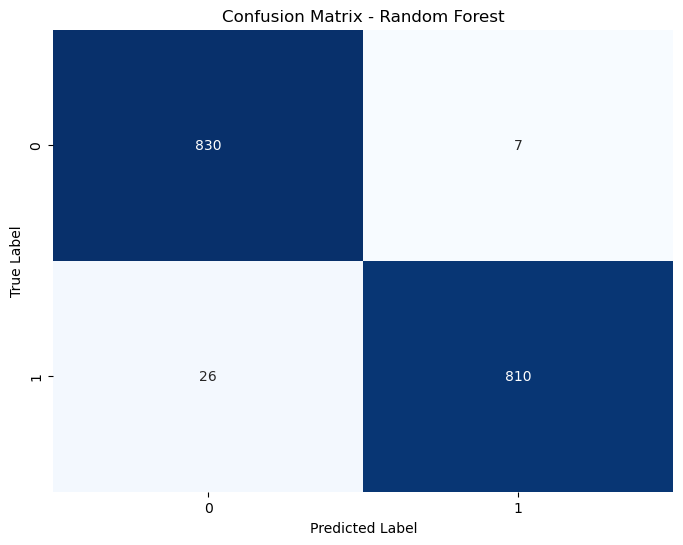

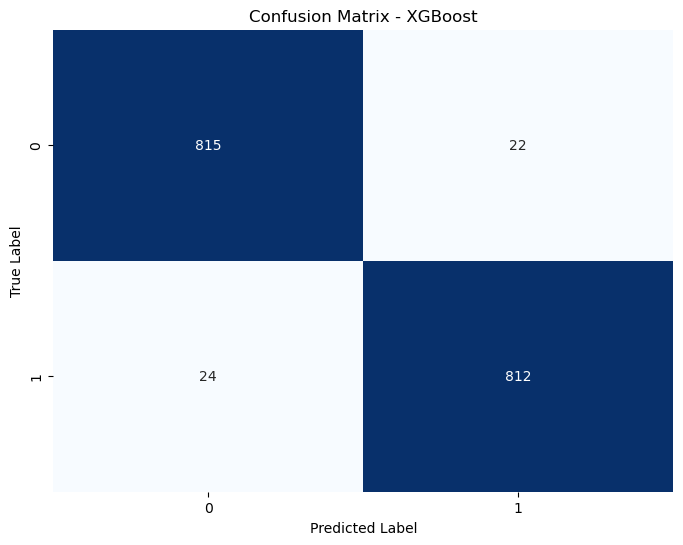

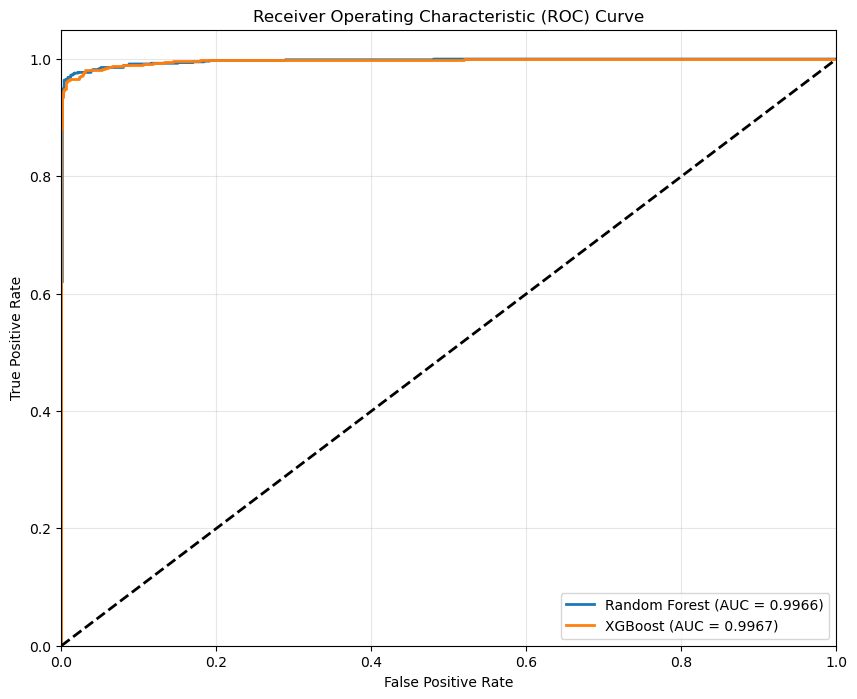

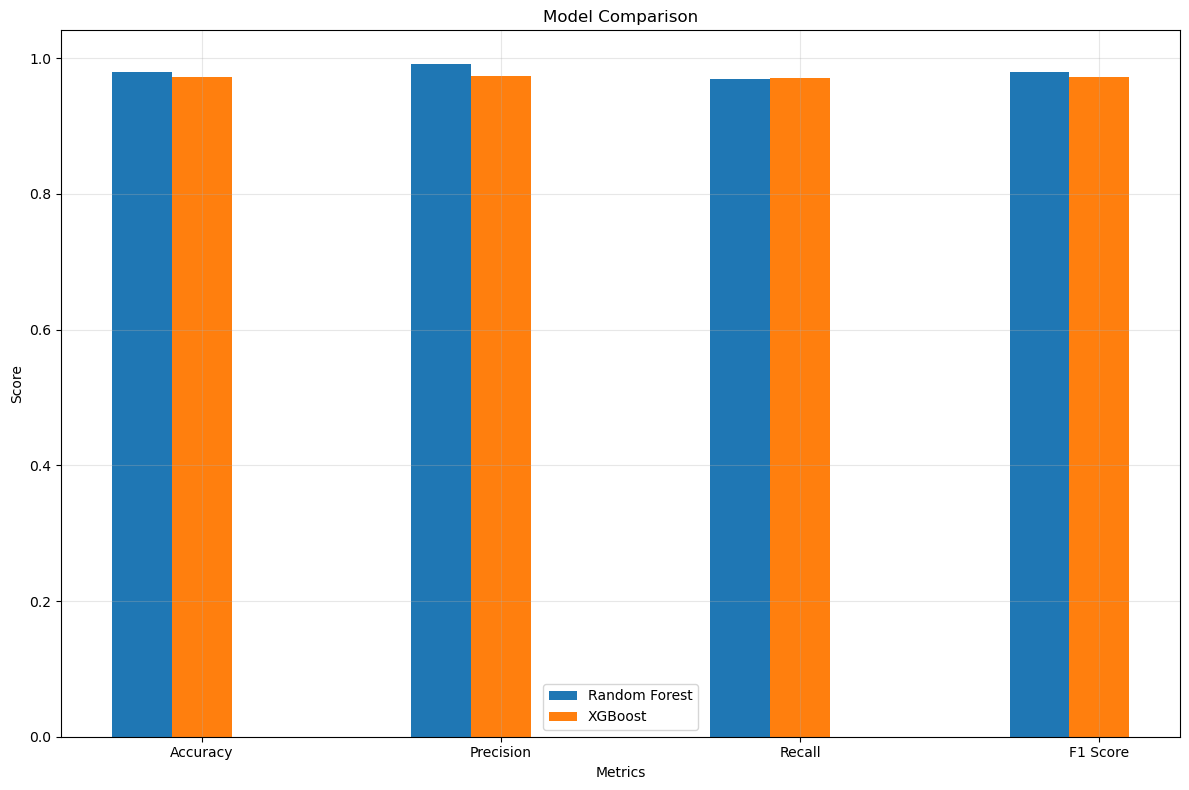

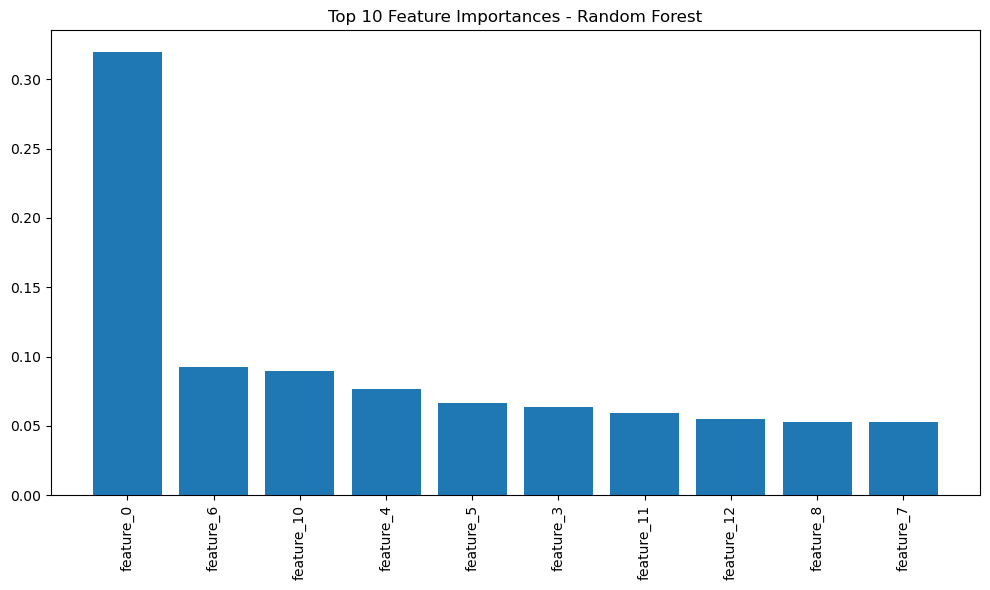

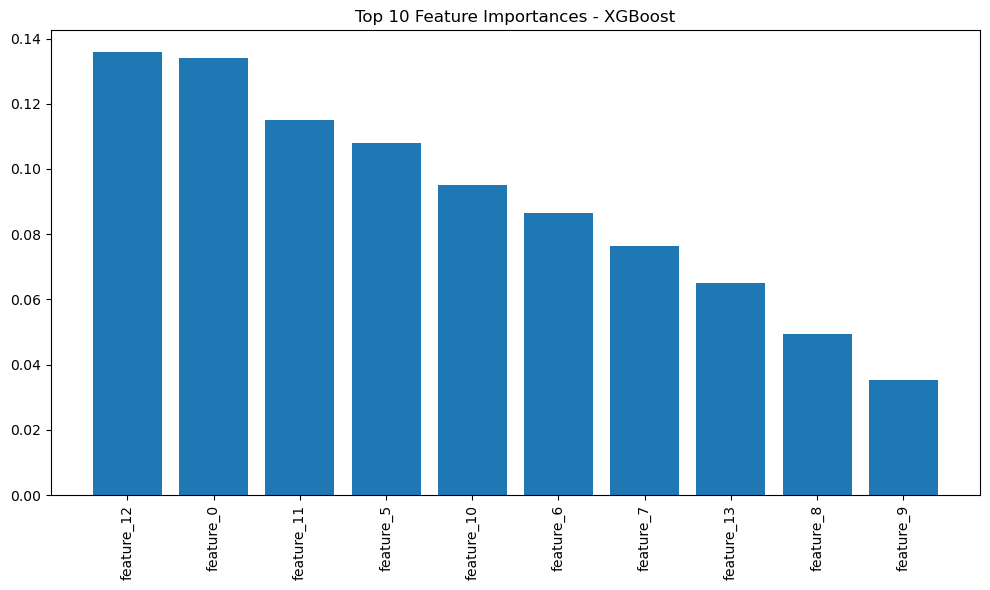

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, auc
)

# Function to make predictions
def get_predictions(model, X_test):
    # Predict class labels
    y_pred = model.predict(X_test)
    # Get probability estimates for ROC curve
    try:
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    except:
        # Some models might not have predict_proba method
        y_pred_proba = model.decision_function(X_test) if hasattr(model, 'decision_function') else None
    return y_pred, y_pred_proba

# Function to calculate and print metrics
def calculate_metrics(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print(f"--- {model_name} Performance Metrics ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    
    return accuracy, precision, recall, f1

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(y_true, y_scores, model_names):
    plt.figure(figsize=(10, 8))
    
    for i, (y_score, model_name) in enumerate(zip(y_scores, model_names)):
        if y_score is not None:
            fpr, tpr, _ = roc_curve(y_true, y_score)
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.4f})')
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    plt.show()

# Function to compare models
def compare_models(metrics_dict):
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    model_names = list(metrics_dict.keys())
    
    fig, ax = plt.subplots(figsize=(12, 8))
    bar_width = 0.2
    index = np.arange(len(metrics))
    
    for i, (model_name, model_metrics) in enumerate(metrics_dict.items()):
        ax.bar(index + i * bar_width, model_metrics, bar_width, label=model_name)
    
    ax.set_xlabel('Metrics')
    ax.set_ylabel('Score')
    ax.set_title('Model Comparison')
    ax.set_xticks(index + bar_width)
    ax.set_xticklabels(metrics)
    ax.legend()
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Make predictions for each model
rf_pred, rf_pred_proba = get_predictions(best_rf, X_test)
xgb_pred, xgb_pred_proba = get_predictions(best_xgb, X_test)


# Calculate metrics for each model
print("\n" + "="*50)
rf_metrics = calculate_metrics(y_test, rf_pred, "Random Forest")
print("\n" + "="*50)
xgb_metrics = calculate_metrics(y_test, xgb_pred, "XGBoost")


# Plot confusion matrices
plot_confusion_matrix(y_test, rf_pred, "Random Forest")
plot_confusion_matrix(y_test, xgb_pred, "XGBoost")


# Plot ROC curves
model_names = ["Random Forest", "XGBoost"]
pred_probas = [rf_pred_proba, xgb_pred_proba]
plot_roc_curve(y_test, pred_probas, model_names)

# Compare models
metrics_dict = {
    "Random Forest": rf_metrics,
    "XGBoost": xgb_metrics
}
compare_models(metrics_dict)

# Plot feature importance for tree-based models (RF and XGB)
def plot_feature_importance(model, feature_names, model_name, top_n=10):
    if hasattr(model, 'feature_importances_'):
        # Get feature importances
        importances = model.feature_importances_
        
        # Sort feature importances in descending order
        indices = np.argsort(importances)[::-1]
        
        # Select top N features
        top_indices = indices[:top_n]
        top_importances = importances[top_indices]
        top_features = [feature_names[i] for i in top_indices]
        
        # Plot feature importances
        plt.figure(figsize=(10, 6))
        plt.title(f'Top {top_n} Feature Importances - {model_name}')
        plt.bar(range(top_n), top_importances, align='center')
        plt.xticks(range(top_n), top_features, rotation=90)
        plt.tight_layout()
        plt.show()
    else:
        print(f"{model_name} does not have feature_importances_ attribute")


feature_names = [f'feature_{i}' for i in range(X_train.shape[1])]
#feature_names = [f'feature_{i}' for i in range(X_test.shape[1])]

# Plot feature importance
plot_feature_importance(best_rf, feature_names, "Random Forest")
plot_feature_importance(best_xgb, feature_names, "XGBoost")

## Testing train model

In [19]:
# Import necessary libraries
import joblib
import os
import pandas as pd
import numpy as np

# 1. Use the correct relative path - go up one directory, then into models
print("Current working directory:", os.getcwd())

# Correct path using parent directory
# Use the most recent model file based on the naming convention
model_path = os.path.join(os.path.dirname(os.getcwd()), "models", "stroke_prediction_model_20250313_214554.joblib")
print(f"Attempting to load model from: {model_path}")

try:
    model = joblib.load(model_path)
    print("✅ Model loaded successfully!")
    print(f"Type of model: {type(model)}")
except Exception as e:
    print(f"❌ Failed to load model: {str(e)}")
    # If fail, try absolute path
    abs_path = os.path.abspath(model_path)
    print(f"Trying absolute path: {abs_path}")
    try:
        model = joblib.load(abs_path)
        print("✅ Model loaded successfully with absolute path!")
    except Exception as e:
        print(f"❌ Still failed: {str(e)}")
        
        # Try another absolute path approach
        project_root = os.path.dirname(os.getcwd())  # Get parent directory
        alternative_path = os.path.join(project_root, "models", "latest_model.joblib")
        print(f"Trying alternative path: {alternative_path}")
        try:
            model = joblib.load(alternative_path)
            print("✅ Model loaded successfully with alternative path!")
        except Exception as e:
            print(f"❌ Still failed: {str(e)}")

# Continue with model testing if the model is loaded
if 'model' in locals():
    print("\n--- Model Attributes ---")
    # Check if it's a scikit-learn model
    if hasattr(model, 'predict'):
        print("✅ Model has predict() method")
    else:
        print("❌ Model does not have predict() method")
        
    if hasattr(model, 'predict_proba'):
        print("✅ Model has predict_proba() method")
    else:
        print("❌ Model does not have predict_proba() method")
        
    # Check for feature names
    if hasattr(model, 'feature_names_in_'):
        print(f"✅ Model has feature_names_in_ attribute")
        print(f"Number of features: {len(model.feature_names_in_)}")
        print("First 10 feature names:", model.feature_names_in_[:10])
    else:
        print("❌ Model does not have feature_names_in_ attribute")
    
    # Test prediction
    print("\n--- Testing Model Prediction ---")
    try:
        # Create a sample input
        sample = {
            "gender": "Male",
            "age": 65.0,
            "hypertension": 1,
            "heart_disease": 0,
            "ever_married": "Yes",
            "work_type": "Private",
            "residence_type": "Urban",
            "avg_glucose_level": 100.0,
            "bmi": 28.0,
            "smoking_status": "formerly smoked"
        }
        
        # Convert to DataFrame
        df = pd.DataFrame([sample])
        print("Sample input data:")
        print(df)
        
        # One-hot encode categorical variables
        df = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 
                                        'residence_type', 'smoking_status'])
        
        # Add missing columns if needed
        if hasattr(model, 'feature_names_in_'):
            expected_columns = model.feature_names_in_
            for col in expected_columns:
                if col not in df.columns:
                    print(f"Adding missing column: {col}")
                    df[col] = 0
            
            # Keep only expected columns
            df = df[expected_columns]
        
        # Make prediction
        prediction = model.predict(df)
        print(f"Prediction result: {prediction}")
        
        if hasattr(model, 'predict_proba'):
            proba = model.predict_proba(df)
            print(f"Stroke probability: {proba[0][1]:.4f}")
        
        print("✅ Model prediction successful!")
    except Exception as e:
        print(f"❌ Error making prediction: {str(e)}")
        import traceback
        traceback.print_exc()
else:
    print("\n❌ Cannot test prediction because model failed to load")

Current working directory: /Users/anuragtrivedi/MyApplication/MLOps_Classification/notebook
Attempting to load model from: /Users/anuragtrivedi/MyApplication/MLOps_Classification/models/stroke_prediction_model_20250313_214554.joblib
✅ Model loaded successfully!
Type of model: <class 'sklearn.ensemble._forest.RandomForestClassifier'>

--- Model Attributes ---
✅ Model has predict() method
✅ Model has predict_proba() method
✅ Model has feature_names_in_ attribute
Number of features: 19
First 10 feature names: ['age' 'hypertension' 'heart_disease' 'avg_glucose_level' 'bmi'
 'gender_Female' 'gender_Male' 'ever_married_No' 'ever_married_Yes'
 'work_type_Govt_job']

--- Testing Model Prediction ---
Sample input data:
  gender   age  hypertension  heart_disease ever_married work_type  \
0   Male  65.0             1              0          Yes   Private   

  residence_type  avg_glucose_level   bmi   smoking_status  
0          Urban              100.0  28.0  formerly smoked  
Adding missing co